# BACTERIA

In [85]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [86]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [87]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [88]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

In [89]:
from qiime2.plugins import feature_table

# summarise and visualise
feature_table.visualizers.summarize(
    table = denoisetable_ba,
    sample_metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 7997850e-a27b-4382-be52-b27fa1e2b703>

## TREE

In [90]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-erzicg1c/7c3486ec-caba-4567-af7f-20b88100e253/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-ccmk294d/c5c622c2-d252-4642-b4e0-fae08d83c7a0/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-ccmk294d/c5c622c2-d252-4642-b4e0-fae08d83c7a0/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    400
      0.29 seconds: Joined    300 of    400
Initial topology in 0.36 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.39 seconds: ME NNI round 2 of 35, 201 of 401 splits, 20 changes (max delta 0.021)
      0.54 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.74 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.85 seconds: SPR round   1 of   2, 401 of 804 nodes
      0.96 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.09 seconds: SPR round   1 of   2, 601 of 804 nodes
      1.2

## ALPHA AND BETA DIVERSITY

In [91]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [92]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [93]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/alpha_rarefaction_plot_ba.png')

In [94]:
qzv_file_alpha

<visualization: Visualization uuid: caaa43da-3fef-4226-9c91-3c3c5251f23d>

### ALPHA DIVERSITY

In [95]:
# set sampling_depth based on alpha rarefacation curve
# normalization step
depth = 25899
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006037884841243803 and the largest is 1.408503754981199.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-9sapy6xl/5784c162-c051-4294-87e4-2ebc133b1827/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-n6pw0vrx

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-9sapy6xl/5784c162-c051-4294-87e4-2ebc133b1827/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-xggn0aq4

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0022776267461696335 and the largest is 0.15550631112507624.


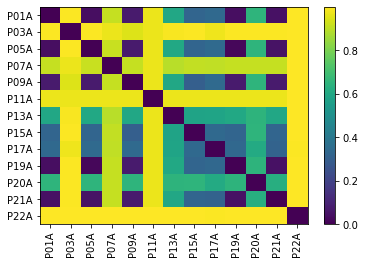

In [96]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

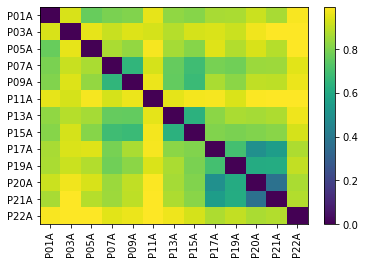

In [97]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [98]:
action_results.jaccard_emperor

<visualization: Visualization uuid: 249813c3-65b8-4d25-9120-0ff874b19d19>

In [99]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance'},
#    steps =  100
# )

# #   metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'}

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar_new.qzv')

In [100]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_rar_new.qzv')
alpha_rar

<visualization: Visualization uuid: 33052260-2124-4f91-9eb4-ed70e8979cd4>

In [101]:
metrics = ['chao1', 'simpson', 'simpson_e', 'observed_features', 'dominance']
#metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson', 'simpson_e']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df= pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

chao1   simpson  simpson_e  observed_features  dominance
Sample ID                                                               
P01A        40.500000  0.073284   0.035969               30.0   0.926716
P03A        82.000000  0.874891   0.097476               82.0   0.125109
P05A        17.333333  0.023526   0.060241               17.0   0.976474
P07A        53.666667  0.710206   0.066360               52.0   0.289794
P09A        25.750000  0.136388   0.046317               25.0   0.863612
P11A        90.000000  0.956498   0.258287               89.0   0.043502
P13A        72.750000  0.797497   0.068586               72.0   0.202503
P15A        44.500000  0.499801   0.049980               40.0   0.500199
P17A       121.000000  0.561078   0.018986              120.0   0.438922
P19A        59.666667  0.033013   0.021545               48.0   0.966987
P20A        84.875000  0.606504   0.030618               83.0   0.393496
P21A        73.600000  0.098685   0.015850               70.0   0.901315
P22A       107.000000  0.875840   0.082185               98.0   0.124160

In [102]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf.head()

chao1   simpson  simpson_e  observed_features  dominance  \
Sample ID                                                                 
P01A       40.500000  0.073284   0.035969               30.0   0.926716   
P03A       82.000000  0.874891   0.097476               82.0   0.125109   
P05A       17.333333  0.023526   0.060241               17.0   0.976474   
P07A       53.666667  0.710206   0.066360               52.0   0.289794   
P09A       25.750000  0.136388   0.046317               25.0   0.863612   

          sample        location       origin  year parkelj specimen  \
Sample ID                                                              
P01A        P01A  Planinska_jama    Paa200_t0  2015      no   Paa200   
P03A        P03A  Planinska_jama    Paa201_t0  2015      no   Paa201   
P05A        P05A           Stobe  Paa204_t10d  2016      no   Paa204   
P07A        P07A  Planinska_jama    Paa209_t0  2017      no   Paa209   
P09A        P09A  Planinska_jama    Paa210_t0  2019      no   Paa210   

                        population  
Sample ID                           
P01A       Linija reke Ljubljanice  
P03A       Linija reke Ljubljanice  
P05A              Dolenjska linija  
P07A       Linija reke Ljubljanice  
P09A       Linija reke Ljubljanice

In [103]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

year               population       value               type
Sample ID                                                              
P01A       2015  Linija reke Ljubljanice   30.000000  observed_features
P03A       2015  Linija reke Ljubljanice   82.000000  observed_features
P05A       2016         Dolenjska linija   17.000000  observed_features
P07A       2017  Linija reke Ljubljanice   52.000000  observed_features
P09A       2019  Linija reke Ljubljanice   25.000000  observed_features
P11A       2018  Linija reke Ljubljanice   89.000000  observed_features
P13A       2019  Linija reke Ljubljanice   72.000000  observed_features
P15A       2019  Linija reke Ljubljanice   40.000000  observed_features
P17A       2019  Linija reke Ljubljanice  120.000000  observed_features
P19A       2016            Črna podvrsta   48.000000  observed_features
P20A       2016            Črna podvrsta   83.000000  observed_features
P21A       2015            Črna podvrsta   70.000000  observed_features
P22A       2020            Črna podvrsta   98.000000  observed_features
P01A       2015  Linija reke Ljubljanice   40.500000              chao1
P03A       2015  Linija reke Ljubljanice   82.000000              chao1
P05A       2016         Dolenjska linija   17.333333              chao1
P07A       2017  Linija reke Ljubljanice   53.666667              chao1
P09A       2019  Linija reke Ljubljanice   25.750000              chao1
P11A       2018  Linija reke Ljubljanice   90.000000              chao1
P13A       2019  Linija reke Ljubljanice   72.750000              chao1
P15A       2019  Linija reke Ljubljanice   44.500000              chao1
P17A       2019  Linija reke Ljubljanice  121.000000              chao1
P19A       2016            Črna podvrsta   59.666667              chao1
P20A       2016            Črna podvrsta   84.875000              chao1
P21A       2015            Črna podvrsta   73.600000              chao1
P22A       2020            Črna podvrsta  107.000000              chao1

1. xlabel = Value --> število ASV
2. ylabel = Sample ID --> osebki
3. legenda: observed_features --> opažene vrednosti
4. population --> 'Genetska linija'

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_obs-feat_chao1.png


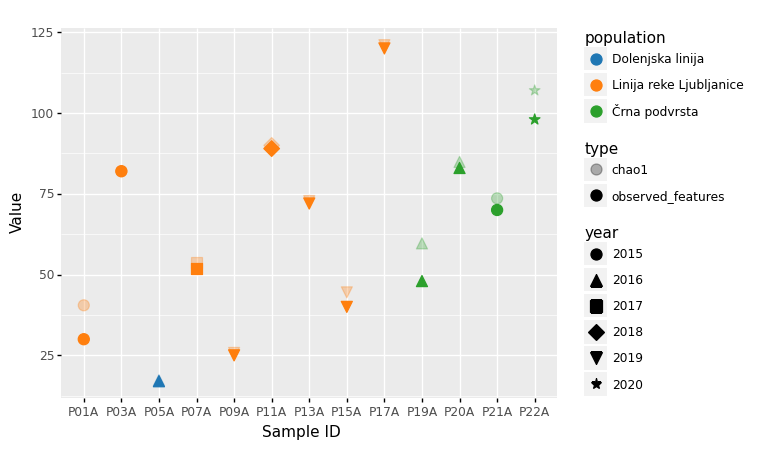

<ggplot: (8768484042430)>

In [104]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
)

p.save('./results/bacteria_obs-feat_chao1.png')

p

In [105]:
#ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)

# fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# ax=axs[0]
# ax.scatter(ndf.index, ndf.observed_features, color="C"+ndf.groupby("population").ngroup().astype(str))
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)

# ax=axs[1]
# ax.scatter(ndf.index, ndf.shannon_entropy)
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)


# plt.tight_layout()

In [106]:
ndf

chao1   simpson  simpson_e  observed_features  dominance  \
Sample ID                                                                  
P01A        40.500000  0.073284   0.035969               30.0   0.926716   
P03A        82.000000  0.874891   0.097476               82.0   0.125109   
P05A        17.333333  0.023526   0.060241               17.0   0.976474   
P07A        53.666667  0.710206   0.066360               52.0   0.289794   
P09A        25.750000  0.136388   0.046317               25.0   0.863612   
P11A        90.000000  0.956498   0.258287               89.0   0.043502   
P13A        72.750000  0.797497   0.068586               72.0   0.202503   
P15A        44.500000  0.499801   0.049980               40.0   0.500199   
P17A       121.000000  0.561078   0.018986              120.0   0.438922   
P19A        59.666667  0.033013   0.021545               48.0   0.966987   
P20A        84.875000  0.606504   0.030618               83.0   0.393496   
P21A        73.600000  0.098685   0.015850               70.0   0.901315   
P22A       107.000000  0.875840   0.082185               98.0   0.124160   

          sample        location         origin  year parkelj specimen  \
Sample ID                                                                
P01A        P01A  Planinska_jama      Paa200_t0  2015      no   Paa200   
P03A        P03A  Planinska_jama      Paa201_t0  2015      no   Paa201   
P05A        P05A           Stobe    Paa204_t10d  2016      no   Paa204   
P07A        P07A  Planinska_jama      Paa209_t0  2017      no   Paa209   
P09A        P09A  Planinska_jama      Paa210_t0  2019      no   Paa210   
P11A        P11A  Planinska_jama      Paa211_t0  2018      no   Paa211   
P13A        P13A  Planinska_jama      Paa219_t0  2019      no   Paa219   
P15A        P15A  Planinska_jama      Paa220_t0  2019      no   Paa220   
P17A        P17A  Planinska_jama      Paa221_t0  2019      no   Paa221   
P19A        P19A          Obrsec  PB271_parkelj  2016     yes    PB271   
P20A        P20A          Obrsec  PB272_parkelj  2016     yes    PB272   
P21A        P21A       Jelsevnik  PB644_parkelj  2015     yes    PB644   
P22A        P22A          Obrsec  PAP20_parkelj  2020     yes    PAP20   

                        population  
Sample ID                           
P01A       Linija reke Ljubljanice  
P03A       Linija reke Ljubljanice  
P05A              Dolenjska linija  
P07A       Linija reke Ljubljanice  
P09A       Linija reke Ljubljanice  
P11A       Linija reke Ljubljanice  
P13A       Linija reke Ljubljanice  
P15A       Linija reke Ljubljanice  
P17A       Linija reke Ljubljanice  
P19A                 Črna podvrsta  
P20A                 Črna podvrsta  
P21A                 Črna podvrsta  
P22A                 Črna podvrsta

In [107]:
# shannon = (
#     ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
#     + geom_point(size=4)
#     + labs(x='Sample ID', y='shannon_entropy')
#     + scale_color_manual(['C0', 'C1', 'C2'])
# )

# shannon.save('./results/bacteria_shannon.png')
# shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson_e.png


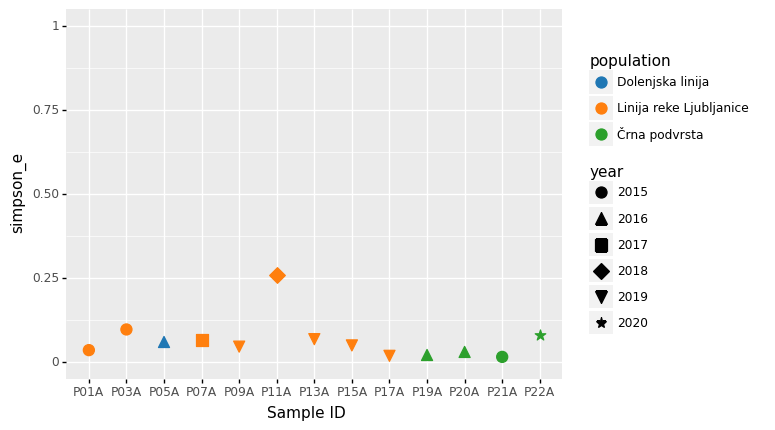

<ggplot: (8768483971886)>

In [108]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/bacteria_simpson_e.png')
simpson 

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson1.png


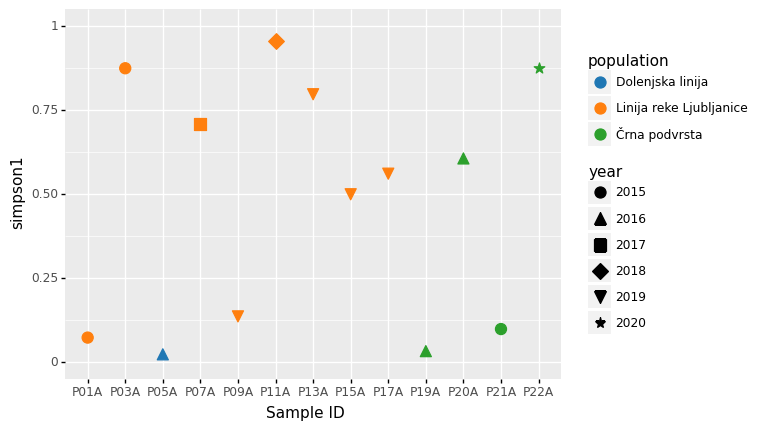

<ggplot: (8768632007159)>

In [126]:
simpson1 = (
    ggplot(ndf, aes(x=ndf.index, y='simpson', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson1.save('./results/bacteria_simpson1.png')
simpson1 

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_dominance.png


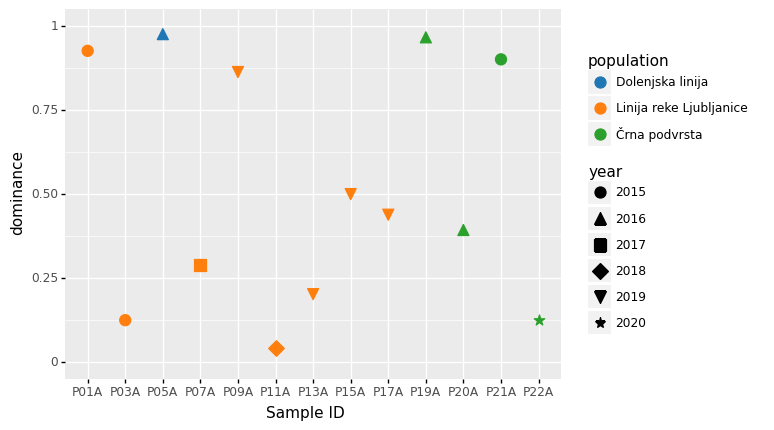

<ggplot: (8768631908744)>

In [127]:
dominance = (
    ggplot(ndf, aes(x=ndf.index, y='dominance', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='dominance')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

dominance.save('./results/bacteria_dominance.png')
dominance

In [109]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [110]:
# # simpson viz
# visualizations['simpson_e']

# # simpson viz
# visualizations['simpson']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

# # observed_features viz
# visualizations['observed_features']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

### BETA DIVERSITY

In [113]:
# make a subset, filter out dolenjska linija P05A
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('Linija reke Ljubljanice', 'Črna podvrsta')"
)

In [114]:
# make a subset, filter out P07A (2017), P11A (2018), P22A (2020); leave 2015, 2016, 2019
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [116]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 27291
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0005290532683110222 and the largest is 1.3177449946723485.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-ddzm0is4/ea61ffc3-f84b-4c52-9003-685c689a6a9c/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-aqibp70l

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-ddzm0is4/ea61ffc3-f84b-4c52-9003-685c689a6a9c/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-6t3qd98d

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0019829764750975785 and the largest is 0.14997775666001492.


In [117]:
depth = 27291
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.00021636338327023246 and the largest is 0.8347622674028102.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-plfg9qoz/1dc4e368-c305-431e-8796-7ce014f07b1c/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-cipho6tg

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-plfg9qoz/1dc4e368-c305-431e-8796-7ce014f07b1c/data/feature-table.biom -t /tmp/qiime2-archive-qjhvdnnu/94cd20cc-8626-46e1-ac39-07db1ac818c8/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-es8xeaty

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0003572742482429759 and the largest is 0.10486765555556198.


#### PERMANOVA

In [118]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization
# statistično značilno skupine enake - potrjena nulta hpoteza

<visualization: Visualization uuid: dac3a97f-2ffd-4688-b70e-1f62a31e5d84>

<Figure size 432x288 with 0 Axes>

In [119]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

# ne moremo trdit da so si med leti enake

<visualization: Visualization uuid: 4754db1b-a999-4d82-85a0-14e474693597>

<Figure size 432x288 with 0 Axes>

#### PERMANOVA ADONIS

Thefunction partitions sums of squares of a multivariate data set, and is
directly analogous to MANOVA (multivariate analysis of variance). This
action differs from beta_group_significance in that it accepts R formulae
to perform multi-way ADONIS tests; beta_group_signficance only performs
one-way tests.

In [120]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population+year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmp9n0z0hxw/dm.tsv /tmp/tmp9n0z0hxw/md.tsv population+year 999 1 /tmp/qiime2-temp-xu292ihk/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 2e44fa9f-42af-4845-8f6b-055ee32821e5>

In [121]:
adonis2 = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year+population"
)

adonis2.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpnhbnixk9/dm.tsv /tmp/tmpnhbnixk9/md.tsv year+population 999 1 /tmp/qiime2-temp-ur8xukeu/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: de3603e1-c0bd-4e89-b5c0-58b46587220d>

In [122]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population*year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpqs1jtqiz/dm.tsv /tmp/tmpqs1jtqiz/md.tsv population*year 999 1 /tmp/qiime2-temp-okg3z6gu/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: c379c02f-d5ca-48a3-ad88-39254cdb8fae>

In [123]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year*population"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpoq0ou_2q/dm.tsv /tmp/tmpoq0ou_2q/md.tsv year*population 999 1 /tmp/qiime2-temp-jvx_0gkr/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 29f66c3d-4549-4381-a013-474fa6a18fa9>

#### ANOSIM

In [124]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: d784c9c6-d4ee-4542-a507-1c810529ffd4>

<Figure size 432x288 with 0 Axes>

In [125]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: 4ddb334a-6c7f-472d-8a44-8910cf496efc>

<Figure size 432x288 with 0 Axes>